### Table of contents <a name="TOC"></a>

* [Scales & projections](#scale_projections)
* [Scales](#scales)
* [Projections](#projections)
* [Exercises](#exercises)


# Scales & projections <a name="scales_projections"></a><span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>

Until now (lesson 1 & 2), we've been using exclusively linear scales along the x and y axis and Catesian projection. But matplotlib offers the possibility to use different scales (log scale, symlog scale, logit scale) and projections (polar, 3D, geographic). We'll review a few of them in this lesson.

<img src="data/projections.png" width="50%" align="left" /> <img src="data/scales.png" width="50%" /> These images come from the [cheatsheets](https://github.com/matplotlib/cheatsheets).


---

# Scales <a name="scales"></a><span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>


Until now (lesson 1 & 2), we've been using exclusively linear scales along the x and y axis. But matplotlib offers the possibility to use different scales such as [log scale](https://matplotlib.org/stable/api/scale_api.html#matplotlib.scale.LogScale), [symlog scale](https://matplotlib.org/stable/api/scale_api.html#matplotlib.scale.SymmetricalLogScale), [logit scale](https://matplotlib.org/stable/api/scale_api.html#matplotlib.scale.LogitScale) or [user scale](https://matplotlib.org/stable/api/scale_api.html#matplotlib.scale.FuncScale) if none of the others fits your need.

Let's start with the log scale and observe what the cosine function looks like when the x scale is logarithmic.

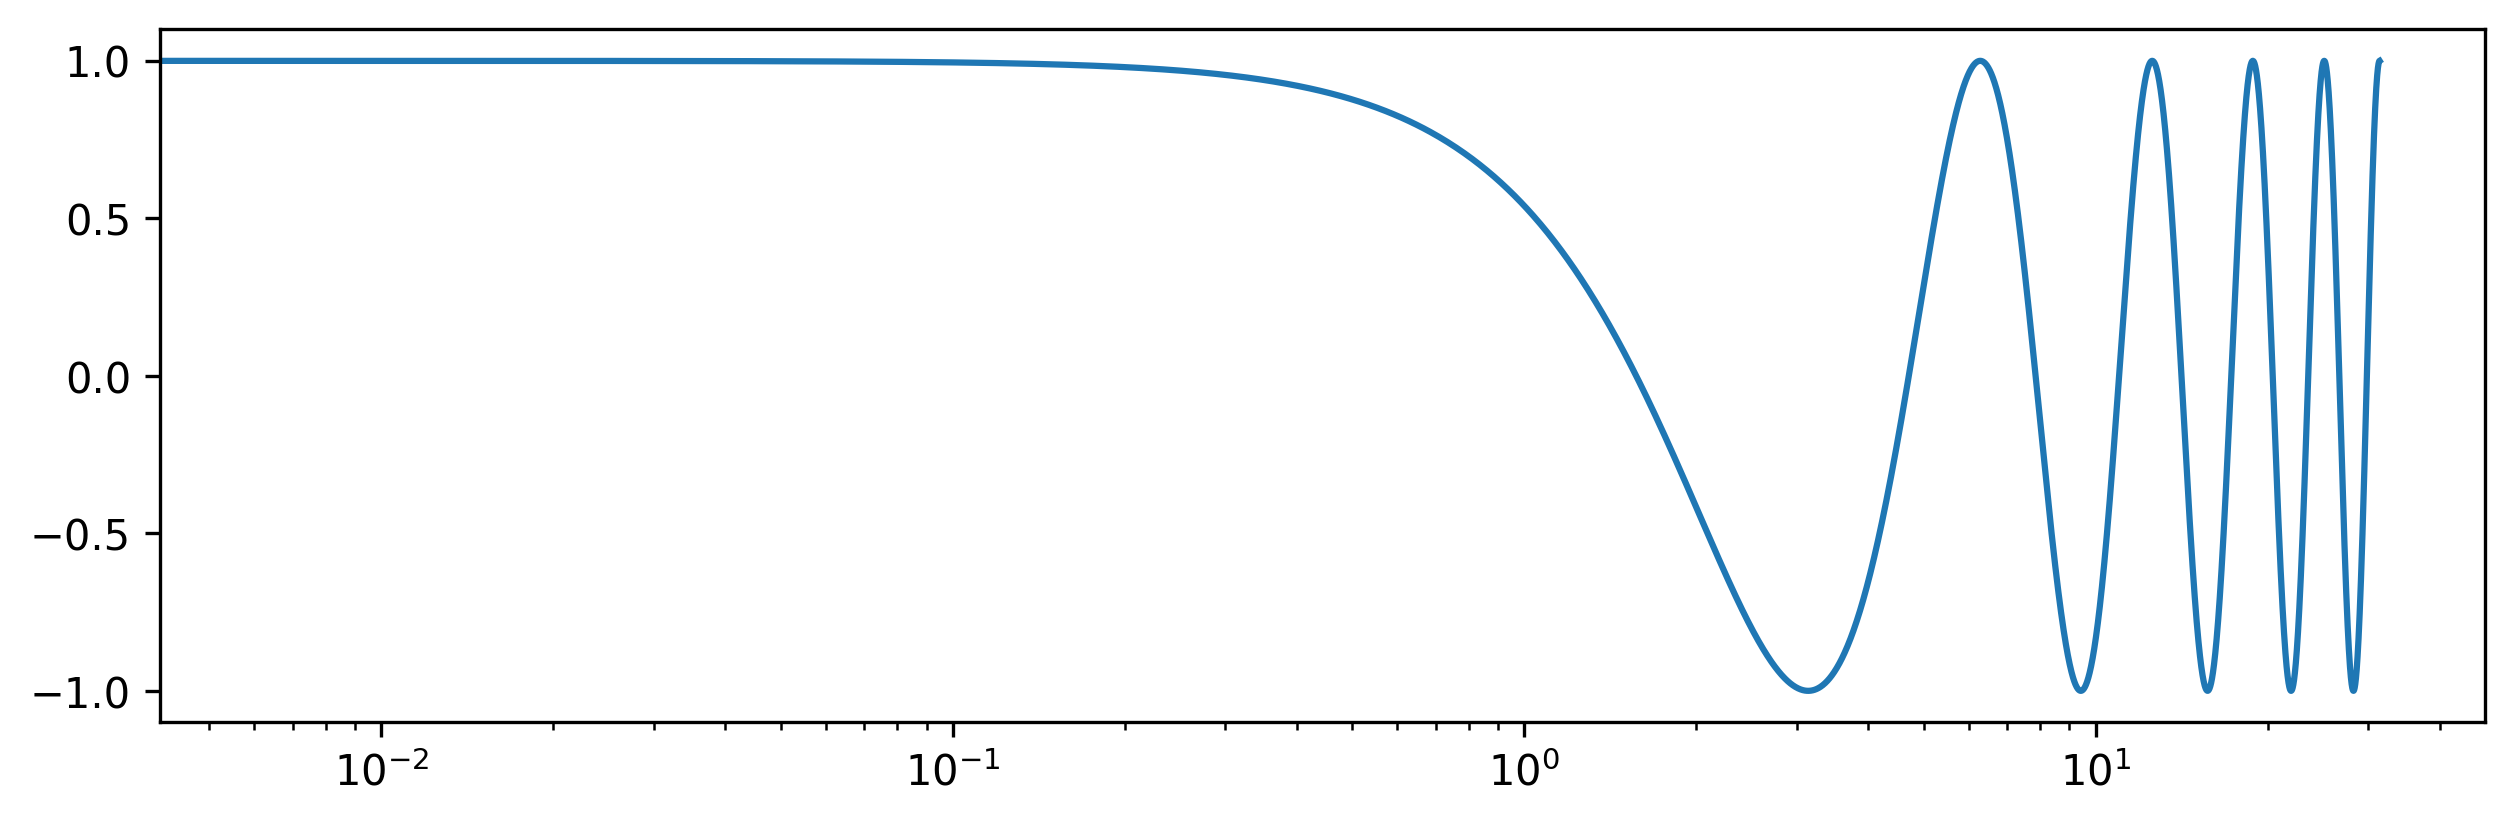

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 10*np.pi, 5000)
Y = np.cos(X)

fig = plt.figure(figsize=(10,3), dpi=300)
ax = plt.subplot(xscale="log")

plt.plot(X,Y)

plt.show();

We can of course do the same with the y scale but we have to take care of not having negative or null values in Y.

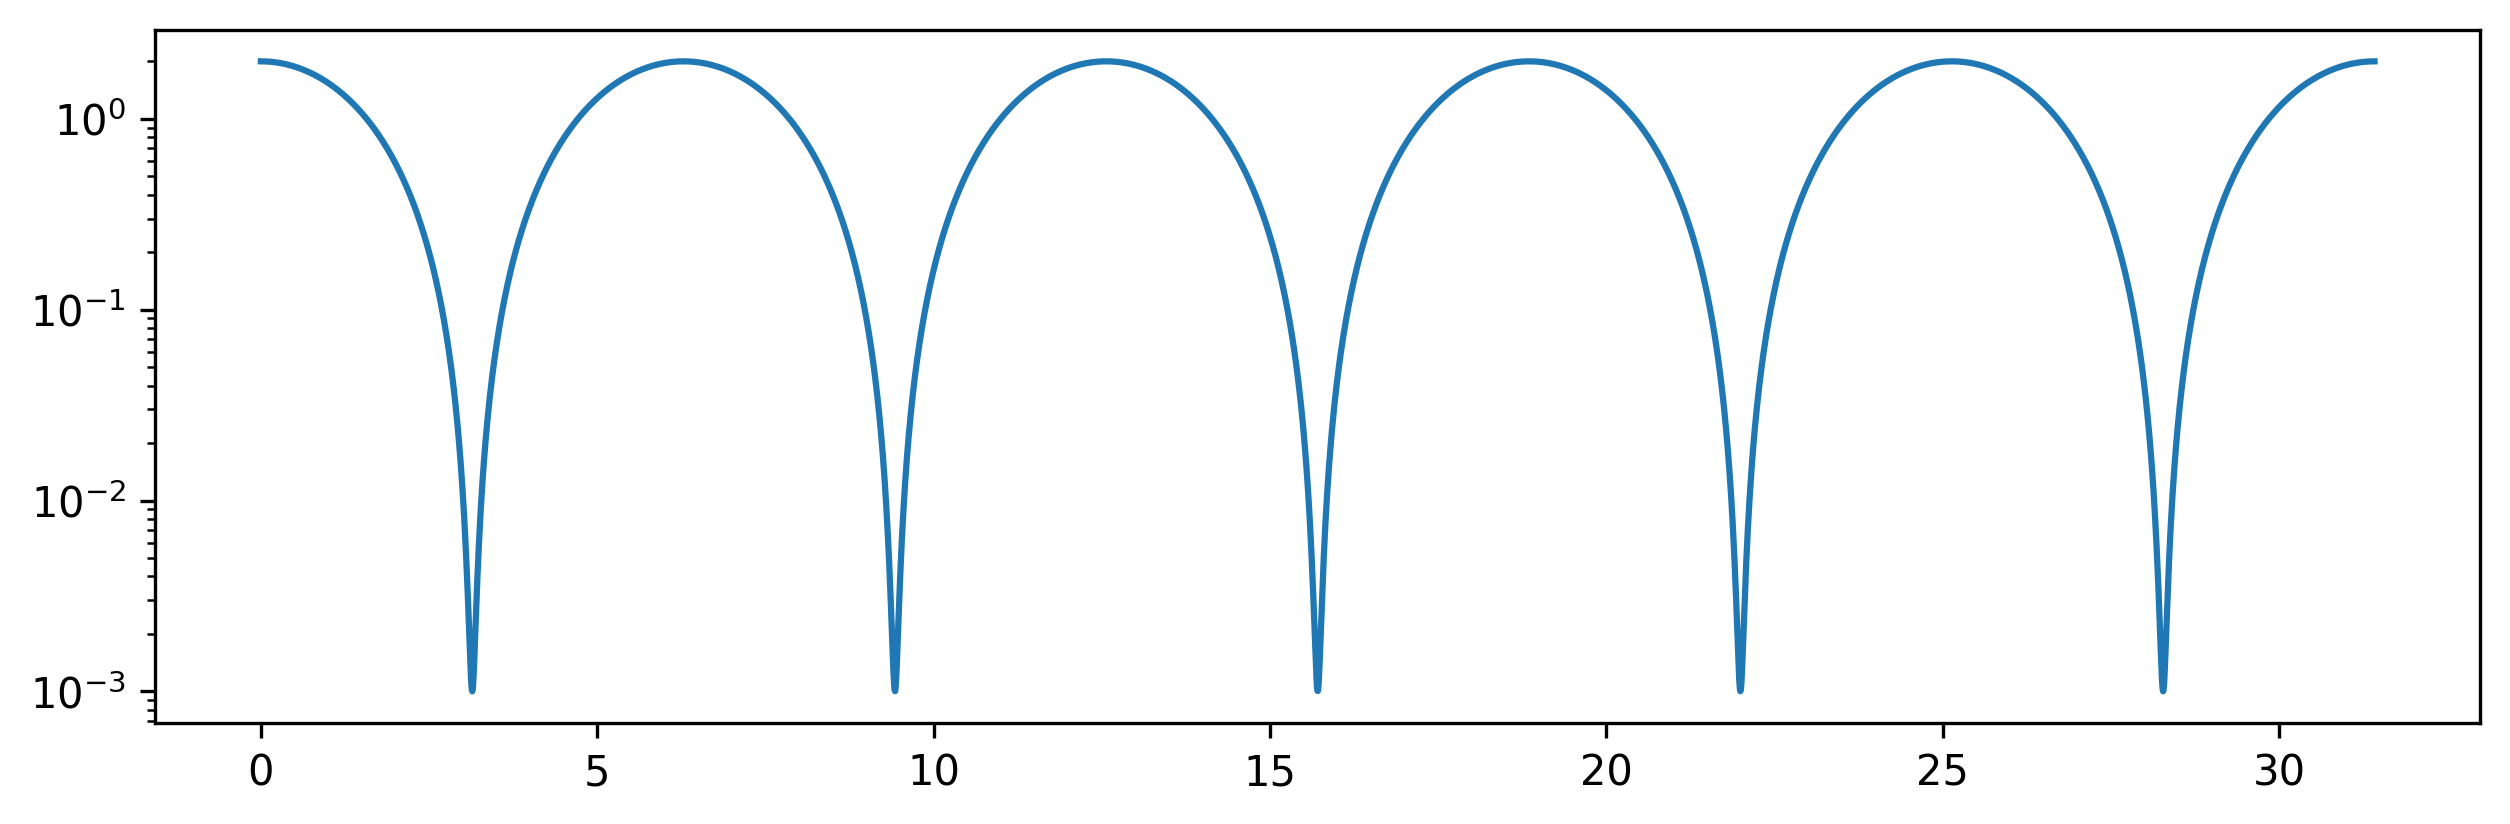

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 10*np.pi, 5000)
Y = 1.001+np.cos(X)

fig = plt.figure(figsize=(10,3), dpi=300)
ax = plt.subplot(yscale="log")

plt.plot(X,Y)

plt.show();

And we can also combine the two scales.

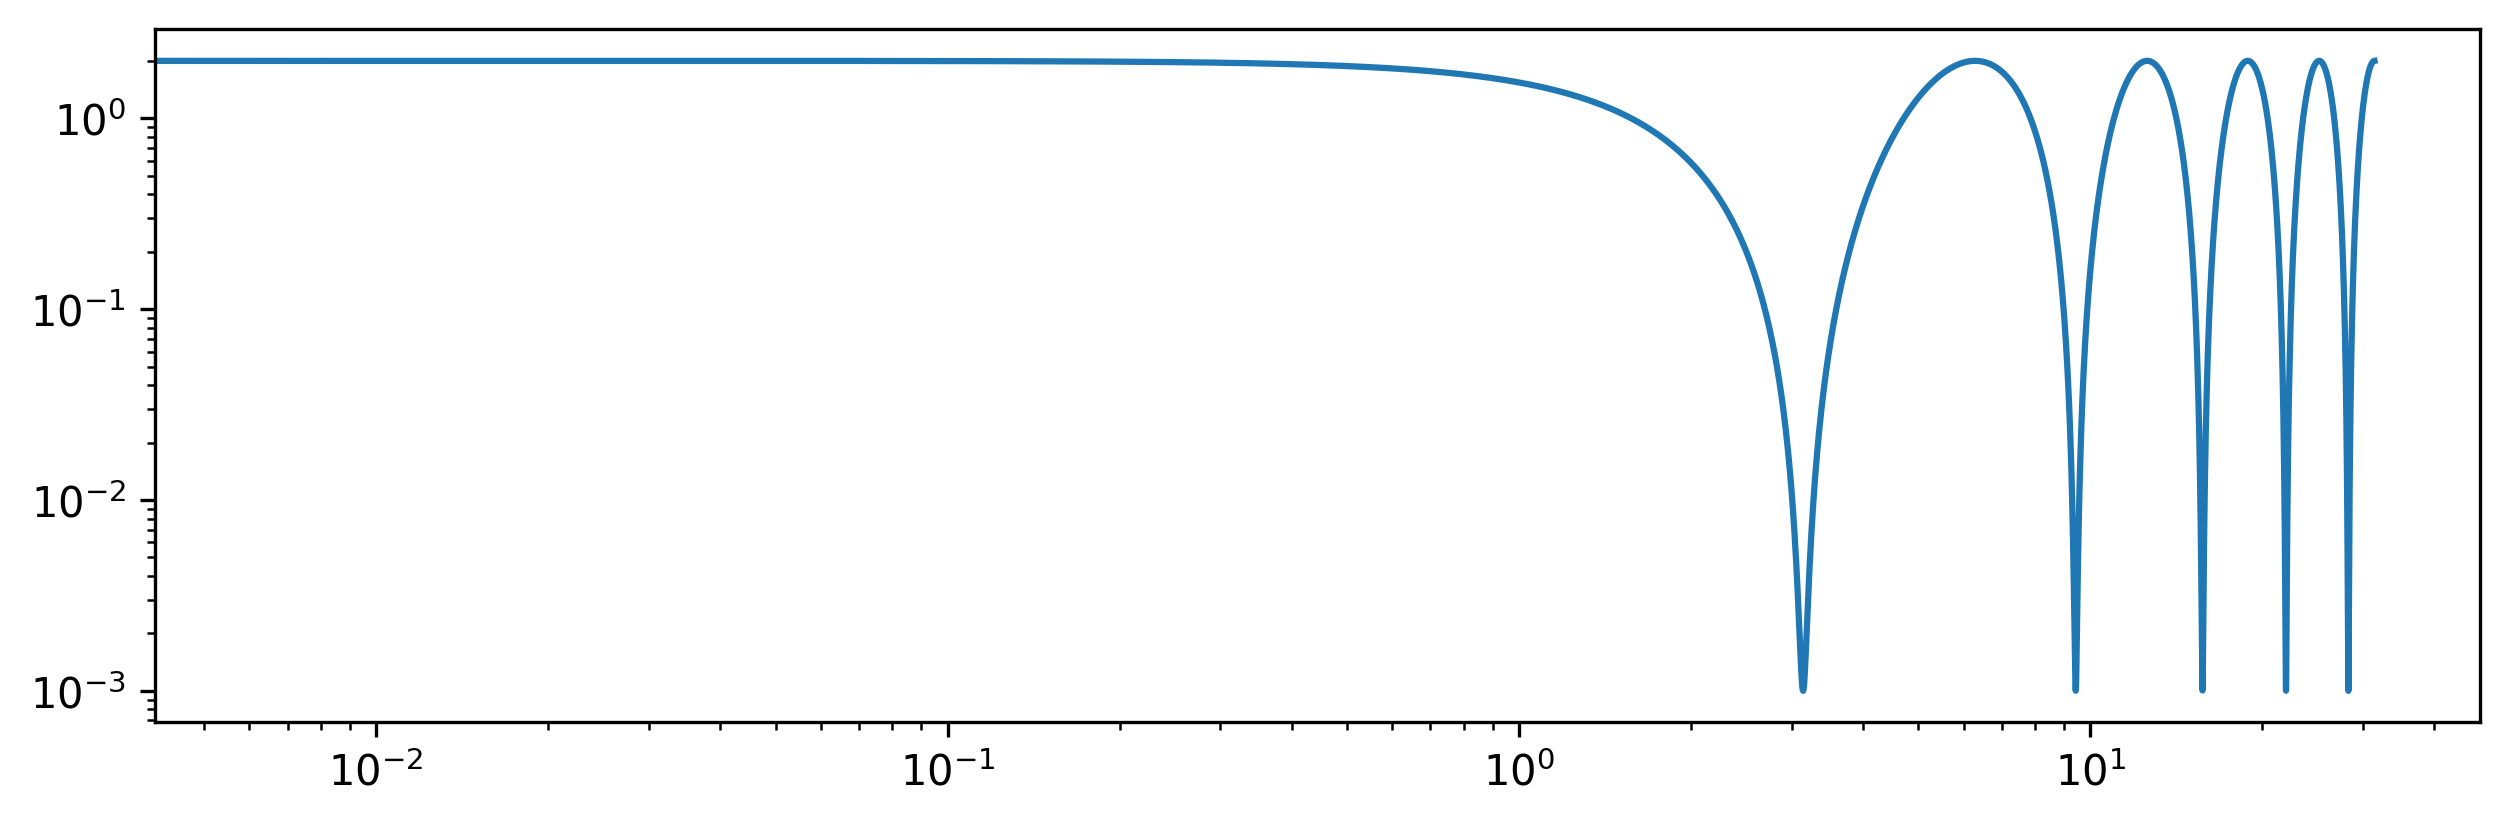

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 10*np.pi, 5000)
Y = 1.001+np.cos(X)

fig = plt.figure(figsize=(10,3), dpi=300)
ax = plt.subplot(xscale = "log", yscale="log")
plt.plot(X,Y)

plt.show();

One question is what will happen if we change the line style? Does is adapt to the scale or not? Let's check.

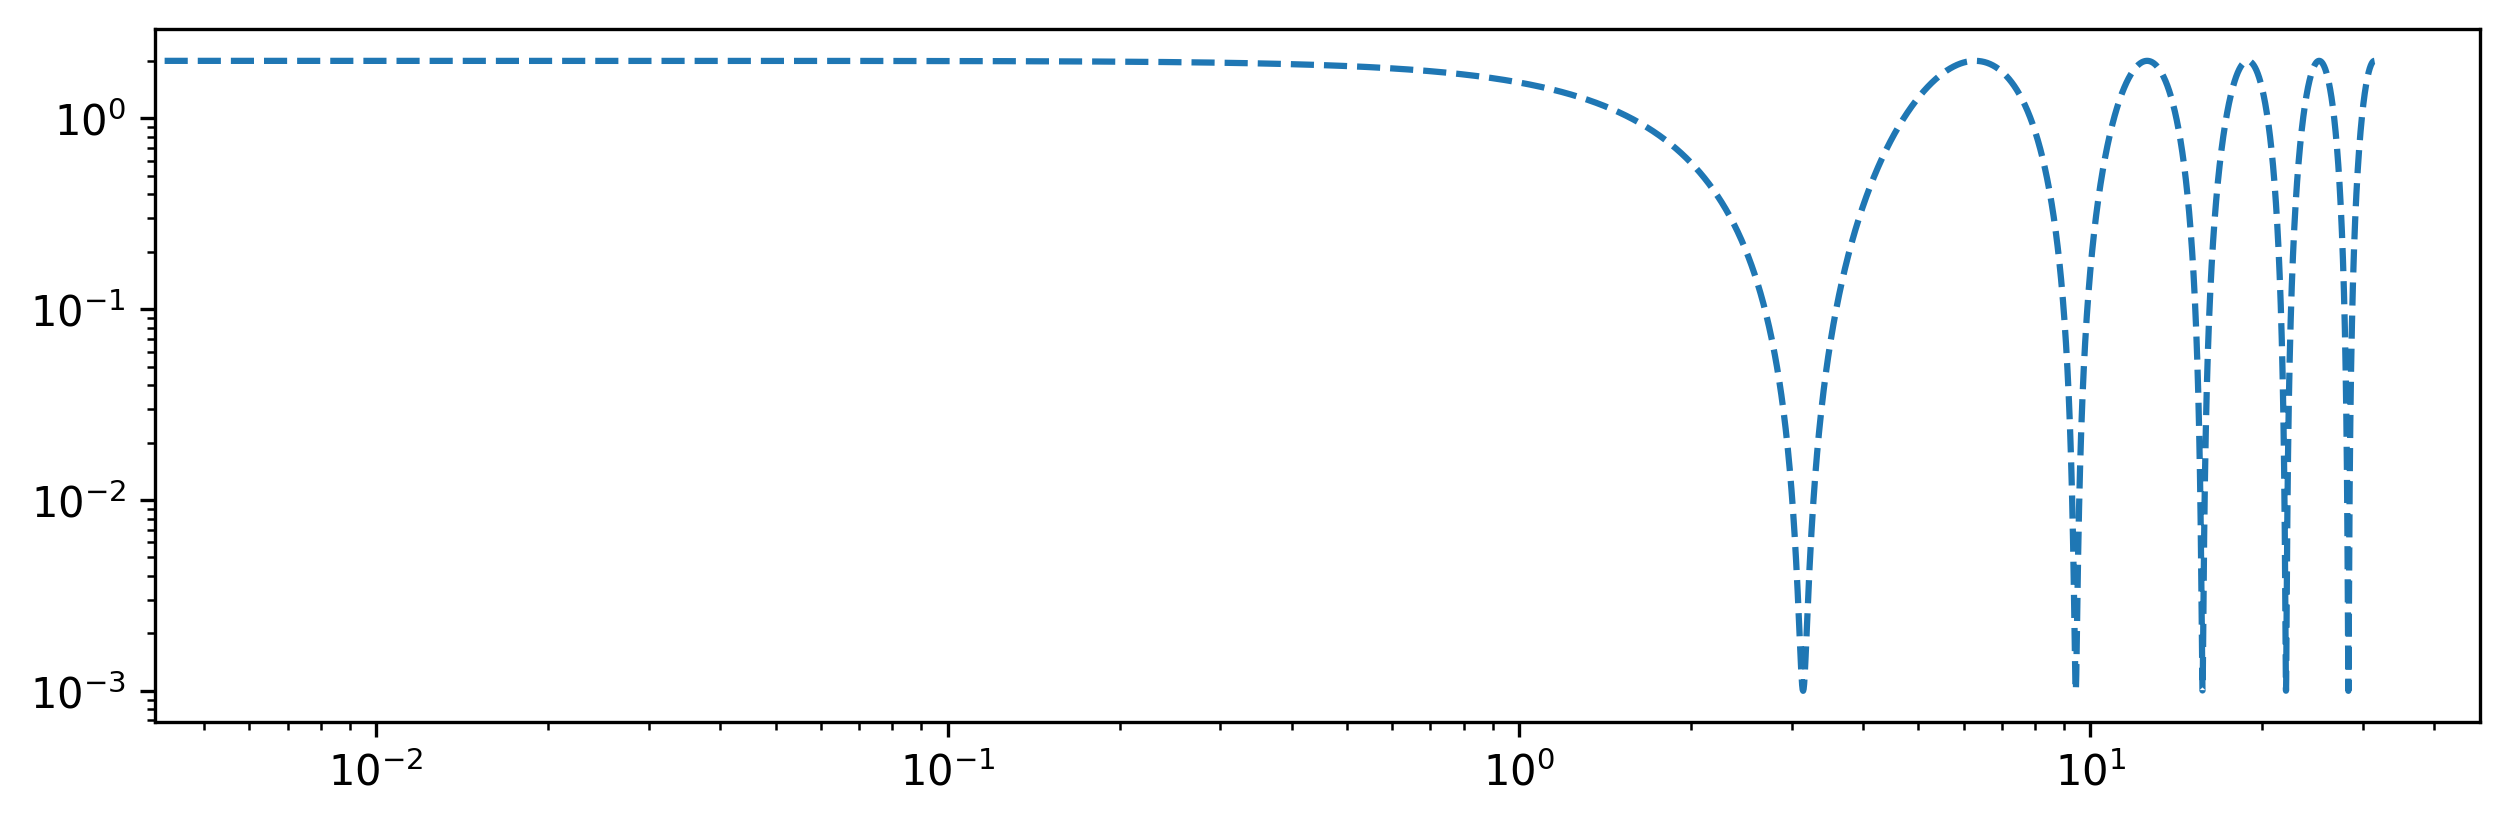

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 10*np.pi, 5000)
Y = 1.001+np.cos(X)

fig = plt.figure(figsize=(10,3), dpi=300)
ax = plt.subplot(xscale="log", yscale="log")

plt.plot(X, Y, "--")

plt.show();

No changes. Dashed remains linear. What about markers then ?

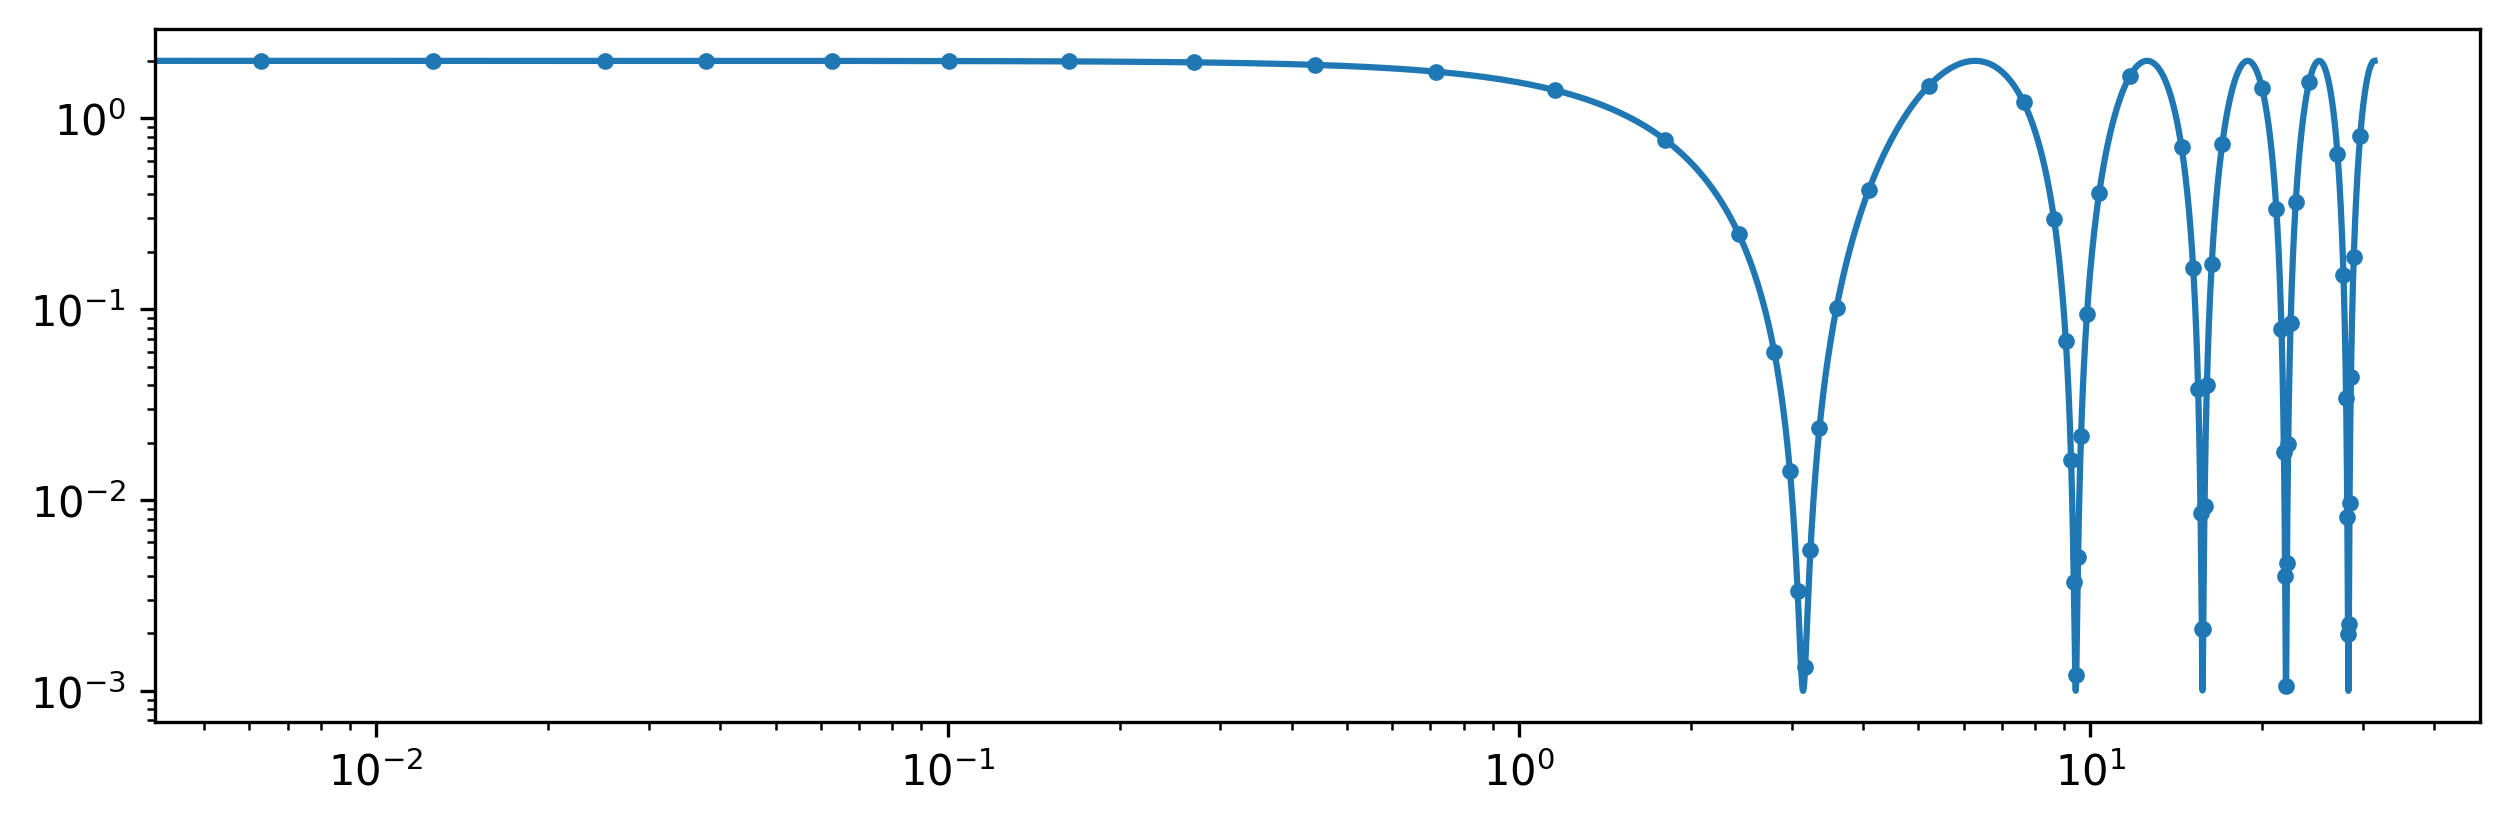

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 10*np.pi, 5000)
Y = 1.001+np.cos(X)

fig = plt.figure(figsize=(10,3), dpi=300)
ax = plt.subplot(xscale="log", yscale="log")
plt.plot(X, Y, "-o", markevery=(0,.05), markersize=3)

plt.show();

Markers spacing follows approximately the curvilinear coordinates of the plot such that the y appear less and less space along the x axis.


When you have an x or y domain that includes null or negative values, then you can use a symlog scale instead of a log scale. There two scales are very similar but the symlog scale includes an area around zero that is linear in order to avoid problem with the log. For negative value, the scale takes care of taking the absolute value and put back the negative sign after.


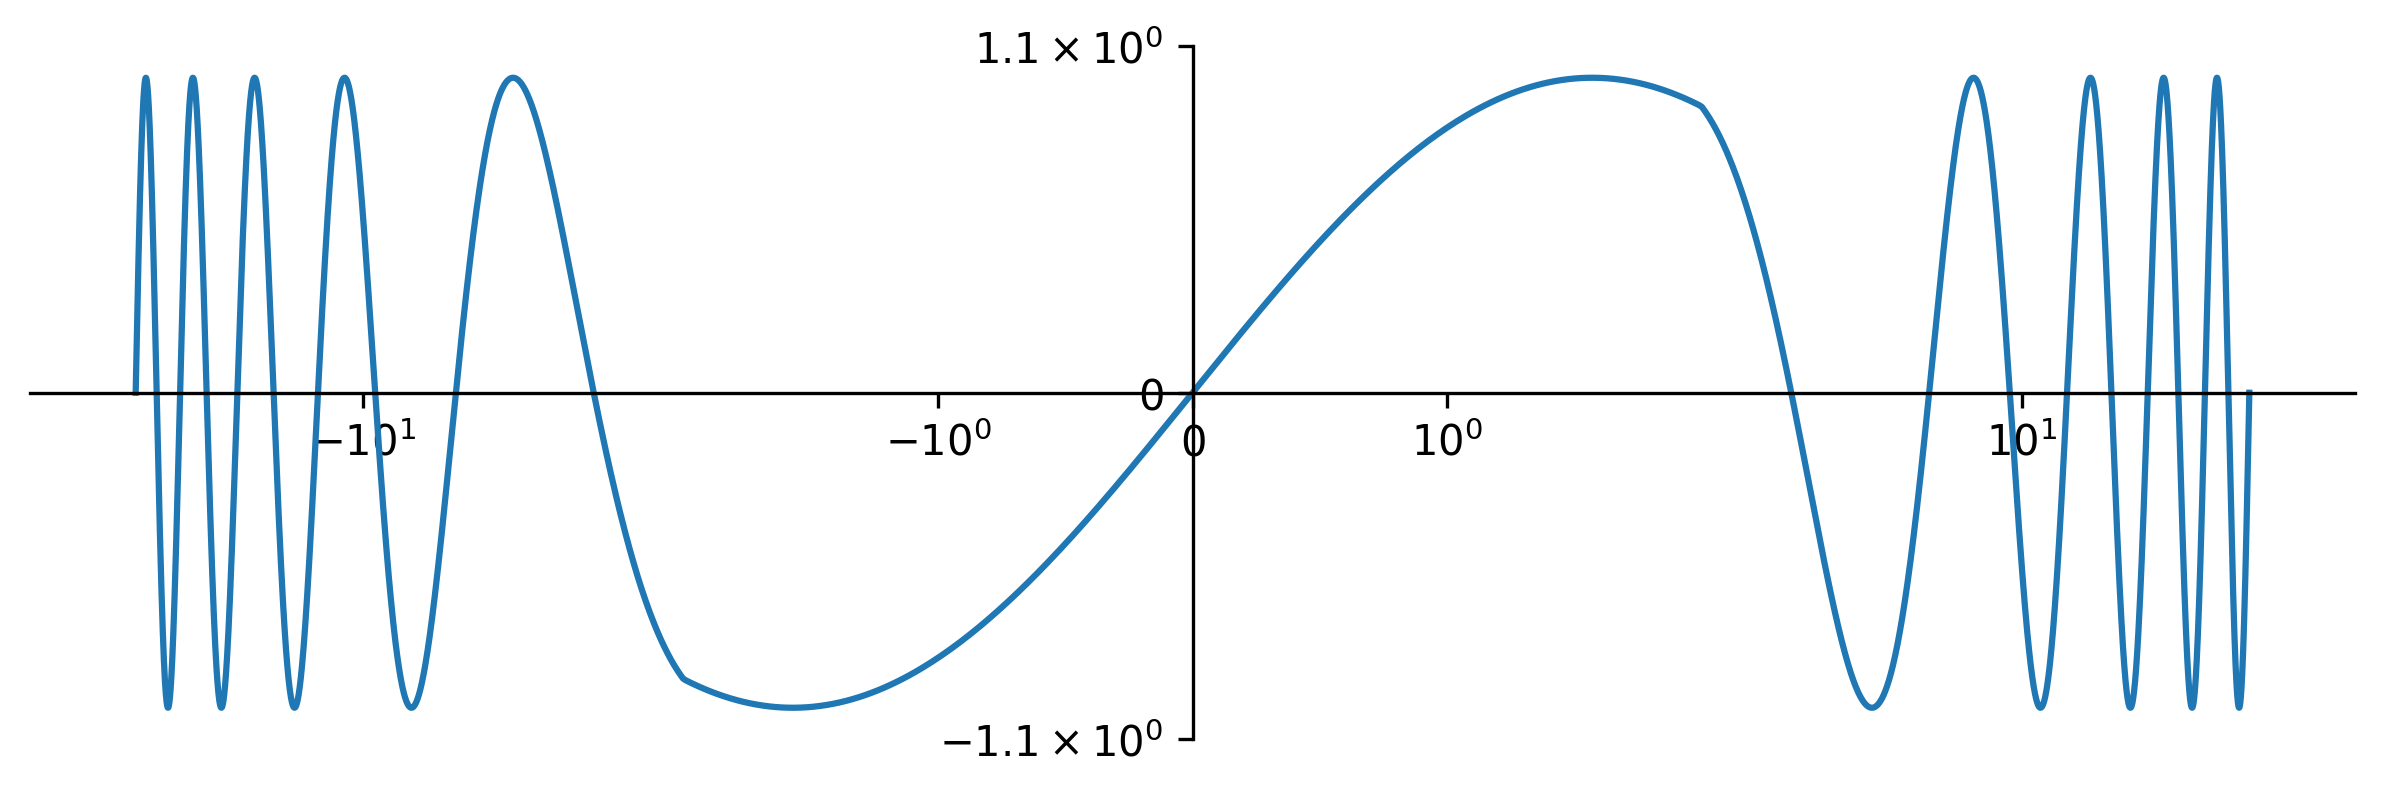

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-10*np.pi, 10*np.pi, 5000)
Y = np.sin(X)

fig = plt.figure(figsize=(10,3), dpi=300)
ax = plt.subplot(xscale="symlog", yscale="symlog")

plt.plot(X, Y)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

plt.show();

What is nice with scales is that they will adapt to almost every plot commands. For example, if we render a uniform scatter plot using a log x xaxis, there will be (visually) more dots on the right.

/var/folders/3k/s8vv032x2hx5kgfs3dzpbqjc0000gn/T/ipykernel_7854/1345286552.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X, Y, 1, marker='o', cmap="Blues")


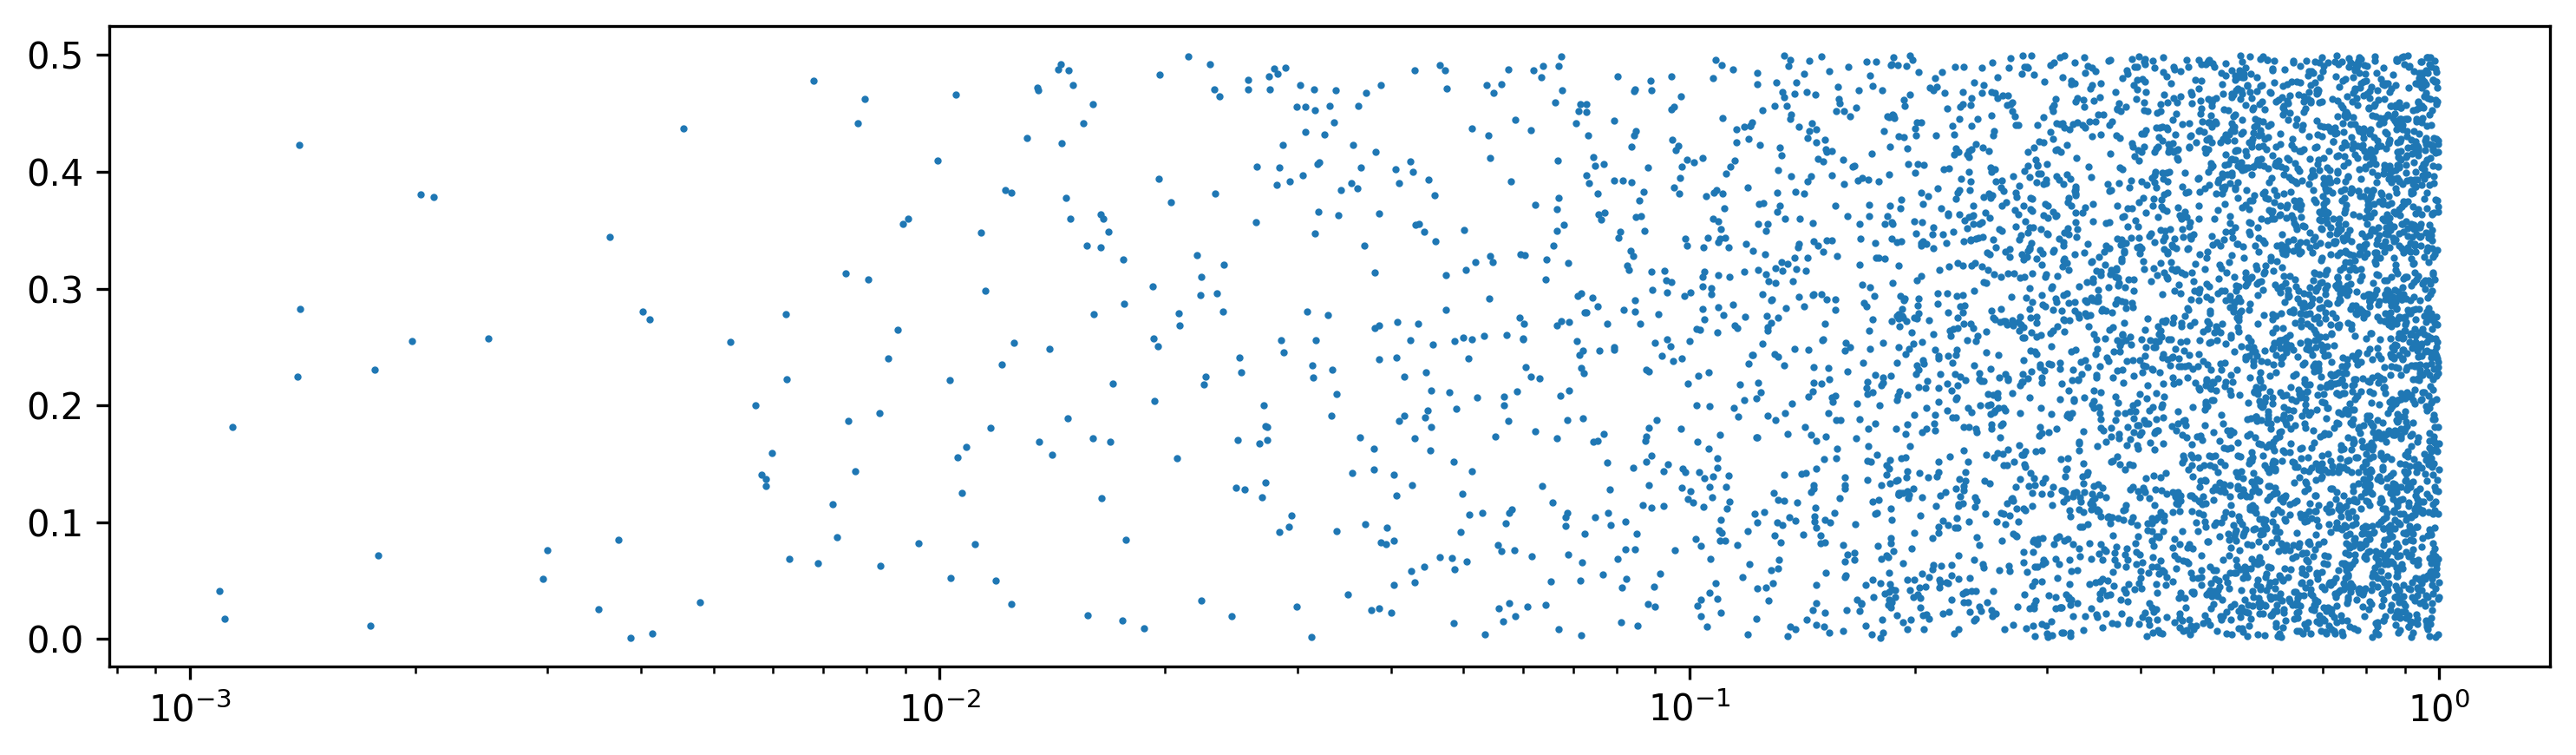

In [7]:
np.random.seed(1);
X = np.random.uniform(0.001, 1.0, 5000)
Y = np.random.uniform(0.001, 0.5, 5000)

fig = plt.figure(figsize=(10,3), dpi=300)
ax = plt.subplot(xscale="log", yscale="linear")
ax.scatter(X, Y, 1, marker='o', cmap="Blues")

plt.tight_layout()
plt.show();

Same is true with bar plot using a log scale that results an interesting rendering. Note that this case, the bars are thinner and thinner while it was not the case with dots in the previous example. The reason is that bars derive from a mesh object while it is not the case for markers.

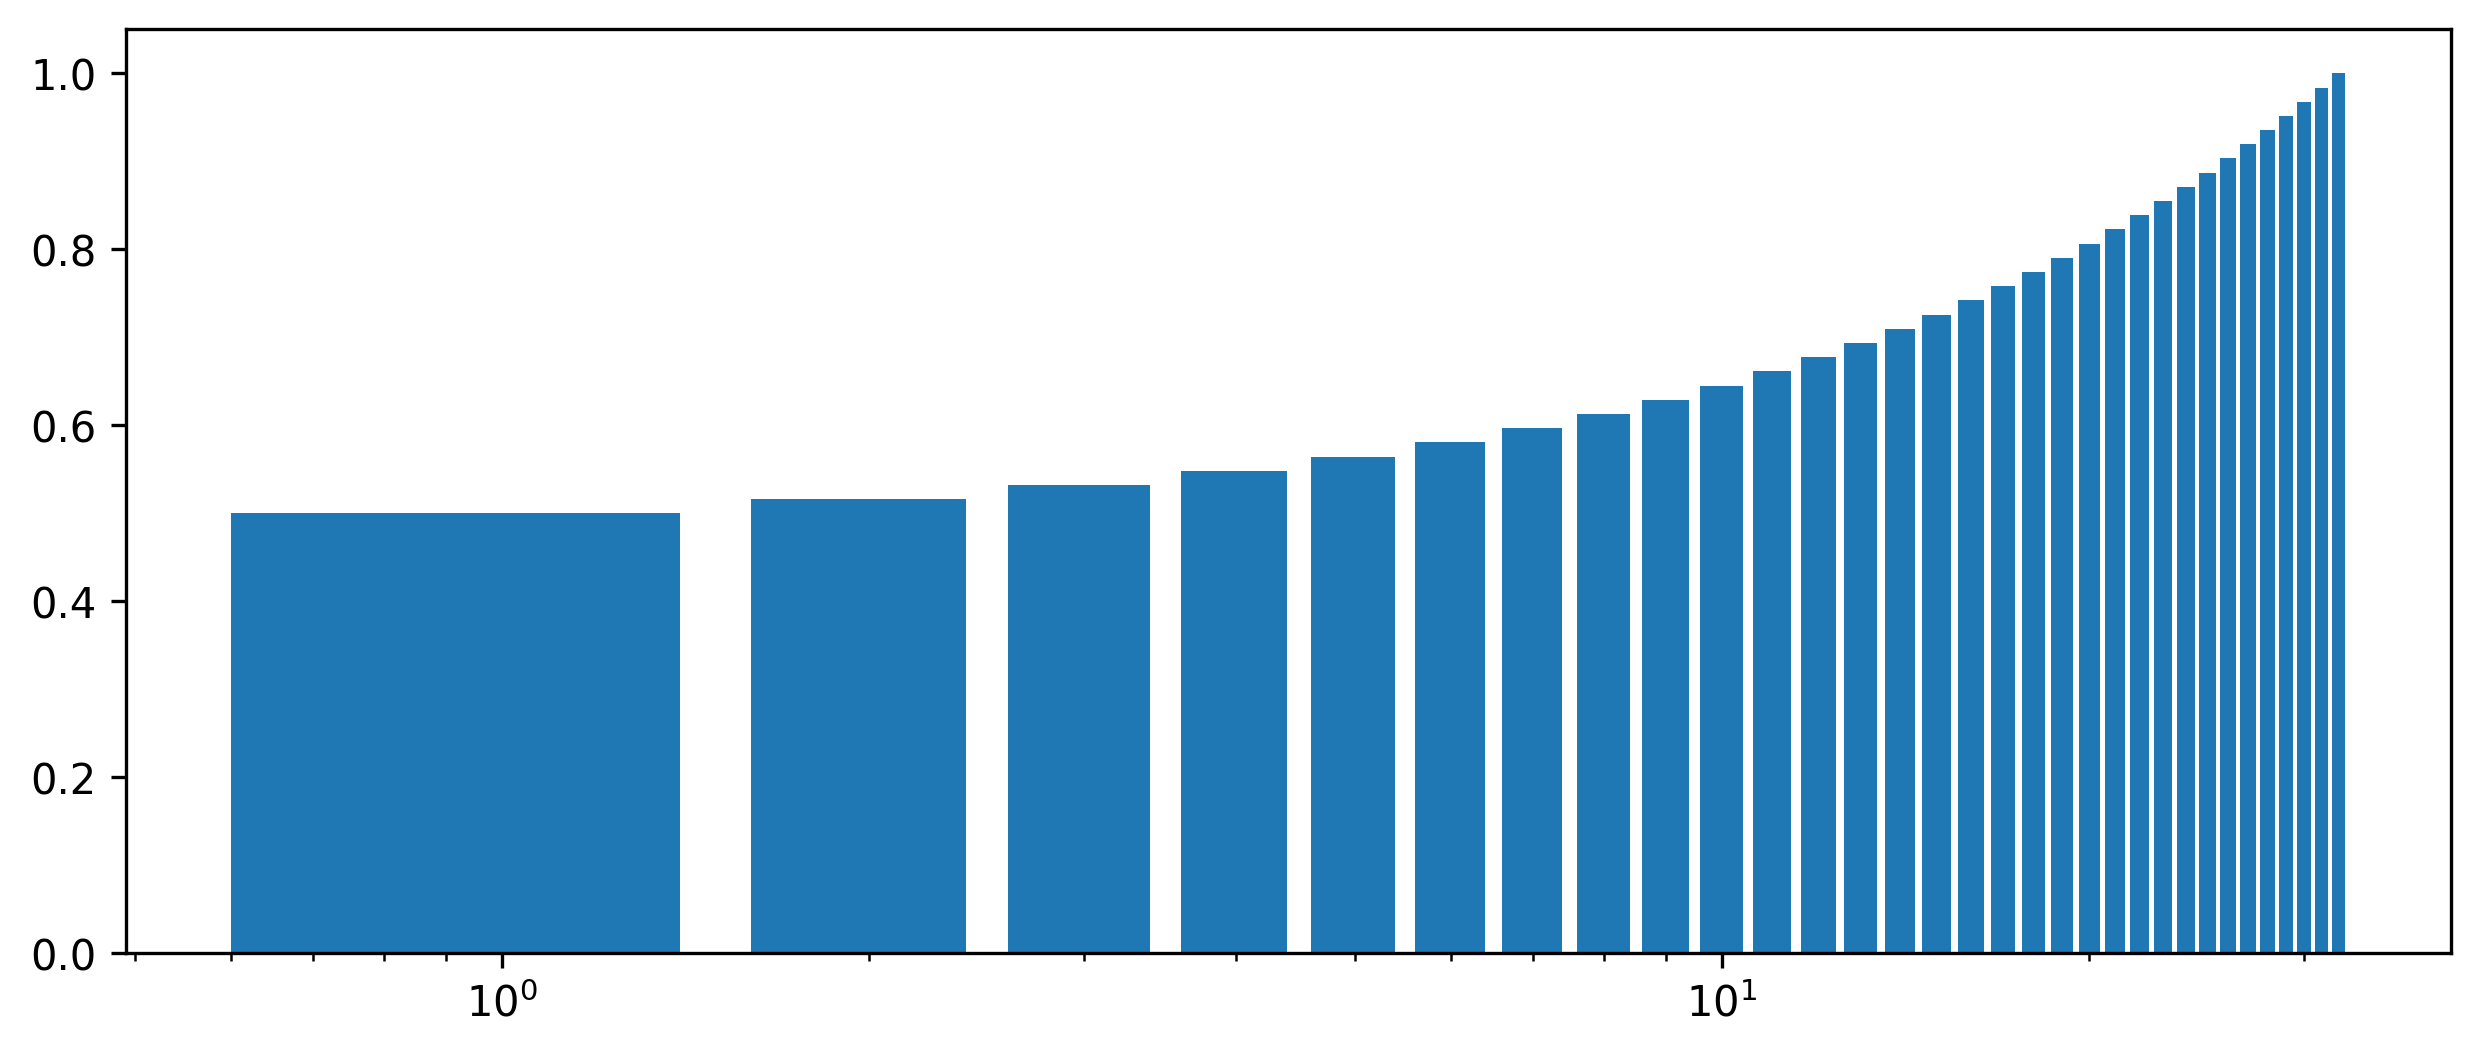

In [8]:
np.random.seed(1)
X = 1+np.arange(0,32)
Y = np.linspace(0.5, 1.0, len(X))

fig = plt.figure(figsize=(10,4), dpi=300)
ax = plt.subplot(xscale="log")
ax.bar(X, Y)

plt.show();

---

# Projections <a name="projections"></a><span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>


Projections is another important concept to know for matplotlib. Until now, we've plotting in the 2D Cartesian space even though we distorted it a bit using scales. But we can also project our data in a different spaces. Well, technically, the data will still live in the Cartesian space because your monitor is Cartesian, but we'll pretend it lives in a different space. Let's try with a polar space.

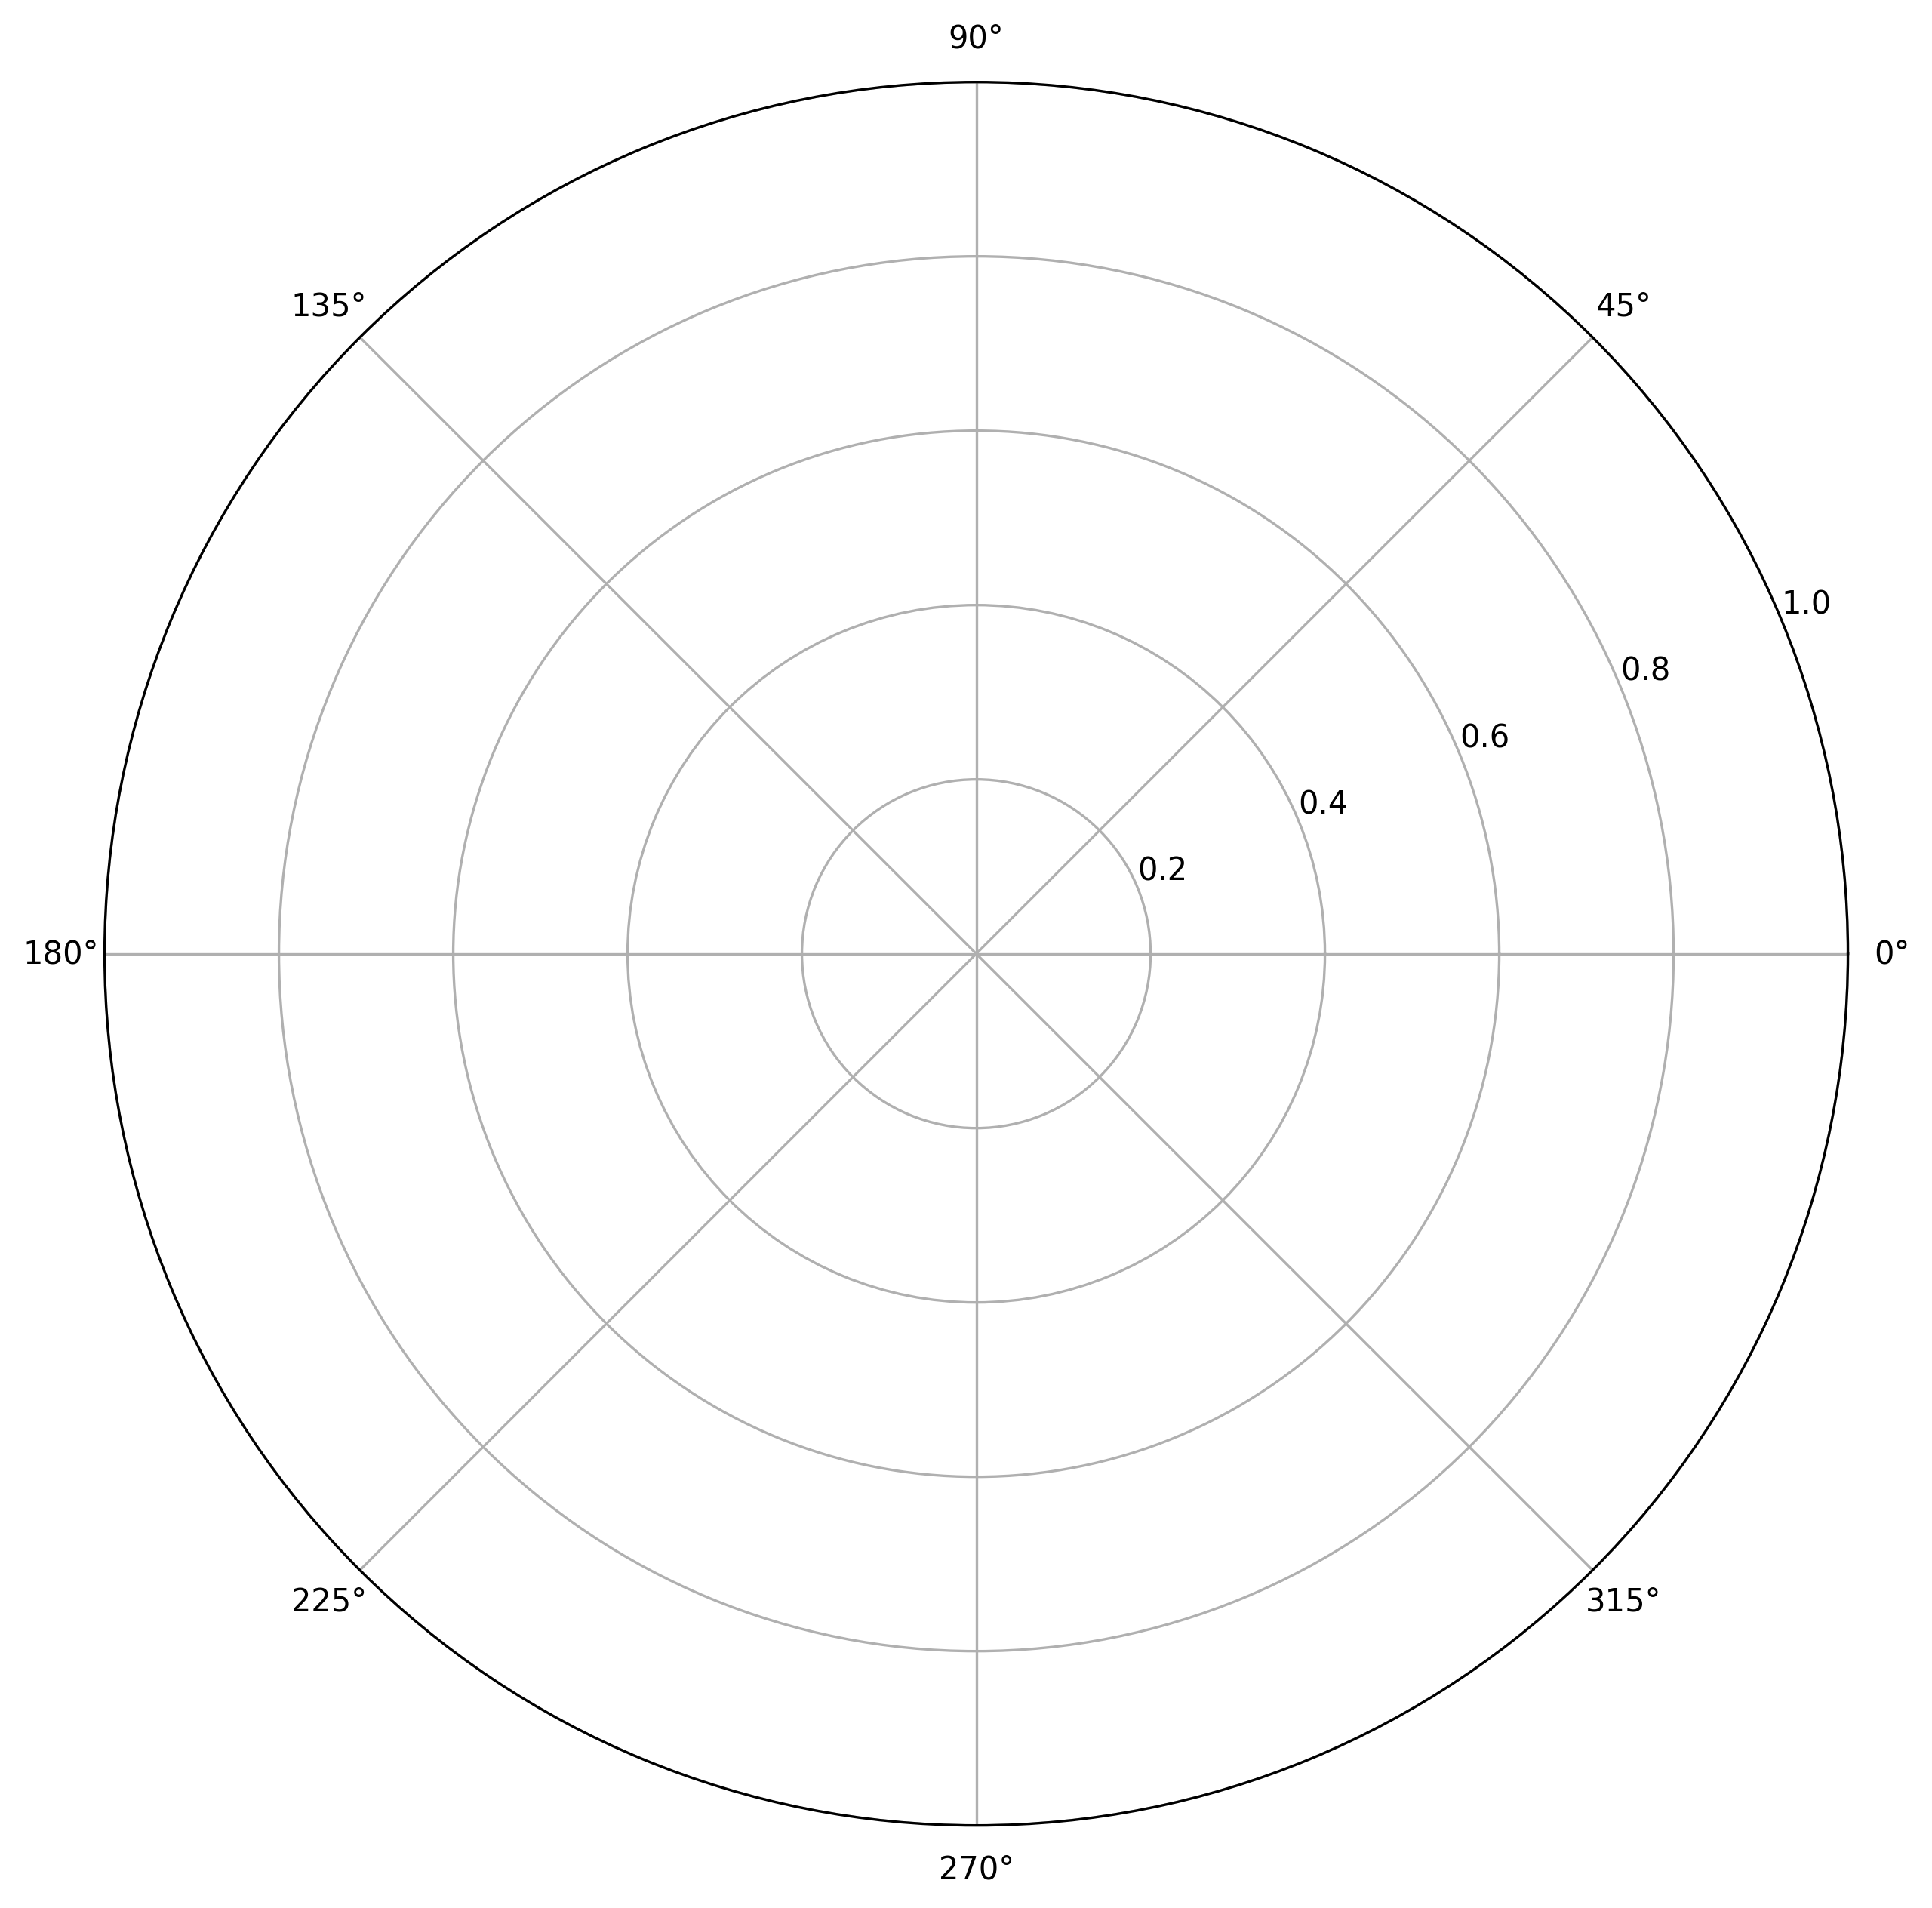

In [9]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10), dpi=300)
ax = plt.subplot(projection="polar")

plt.show();

The polar projection comes with specific settings because some settings do not make sense anymore, such as for example x and y limits. So let's play with the new settings.

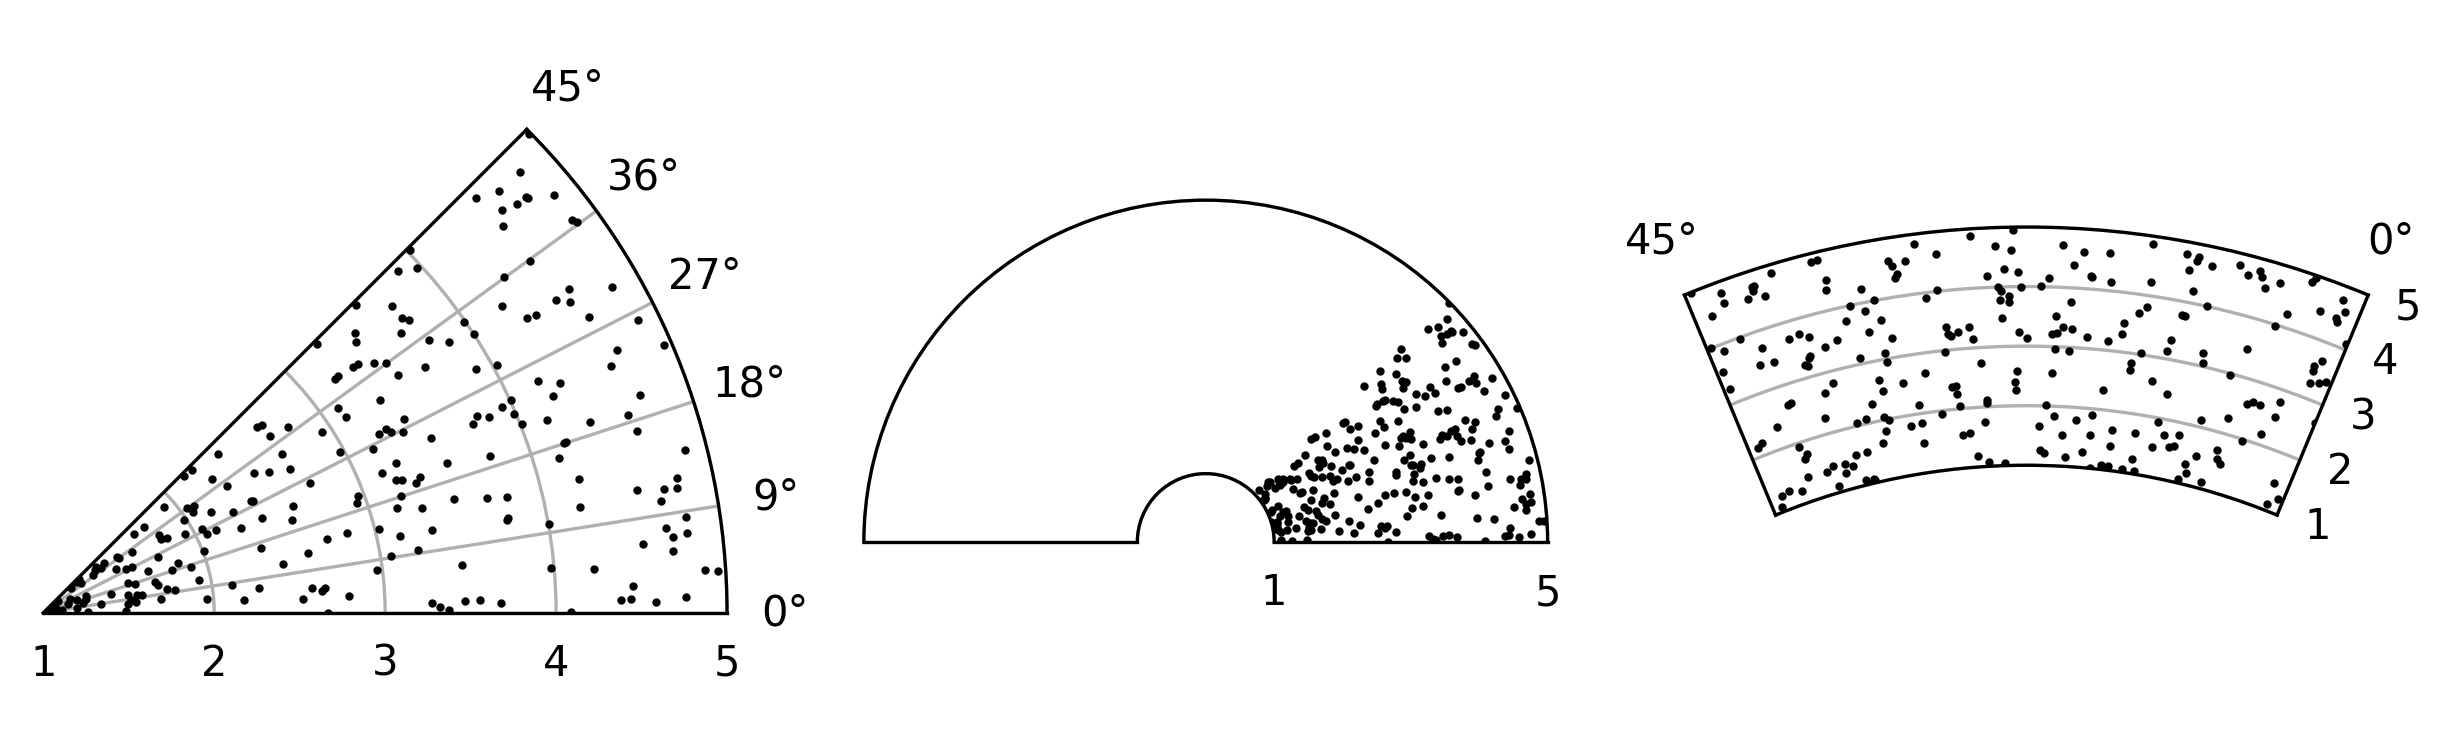

In [10]:
import numpy as np
import matplotlib.pyplot as plt

R = np.random.uniform(1, 5, 250)
T = np.random.uniform(0, 45/180*np.pi, 250)

fig = plt.figure(figsize=(10,4), dpi=300)

ax = plt.subplot(1, 3, 1, projection="polar")
ax.scatter(T, R, 1, "black", zorder=10)
ax.set_rmin(1)                # Minimum radius
ax.set_rmax(5)                # Maximum radius
ax.set_rorigin(1)             # Origin position
ax.set_rticks(1+np.arange(5)) # Maximum radius
ax.set_thetamin(0)            # Minimum angle (degrees)
ax.set_thetamax(45)           # Maximum radius (degrees)
ax.set_theta_offset(0)        # Origin orientation

ax = plt.subplot(1, 3, 2, projection="polar")
ax.scatter(T, R, 1, "black", zorder=10)
ax.set_rmin(1) 
ax.set_rmax(5) 
ax.set_rorigin(0)
ax.set_rticks([1,5])
ax.set_thetamin(0)
ax.set_thetamax(180)
ax.set_theta_offset(0)
ax.set_xticks([])

ax = plt.subplot(1, 3, 3, projection="polar")
ax.scatter(T, R, 1, "black", zorder=10)
ax.set_rmin(1)
ax.set_rmax(5) 
ax.set_rorigin(-10)
ax.set_rticks([1,2,3,4,5])
ax.set_thetamin(0)
ax.set_thetamax(45)
ax.set_theta_offset(0.5 * 3*np.pi/4)
ax.set_xticks([0, np.pi/4])

plt.show();

As you can see, a polar plot can be rendered in a number of different ways. You're not stuck with the regular full polar axes.

Unfortunately, imshow does not work with polar projection and we have to use [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) instead.

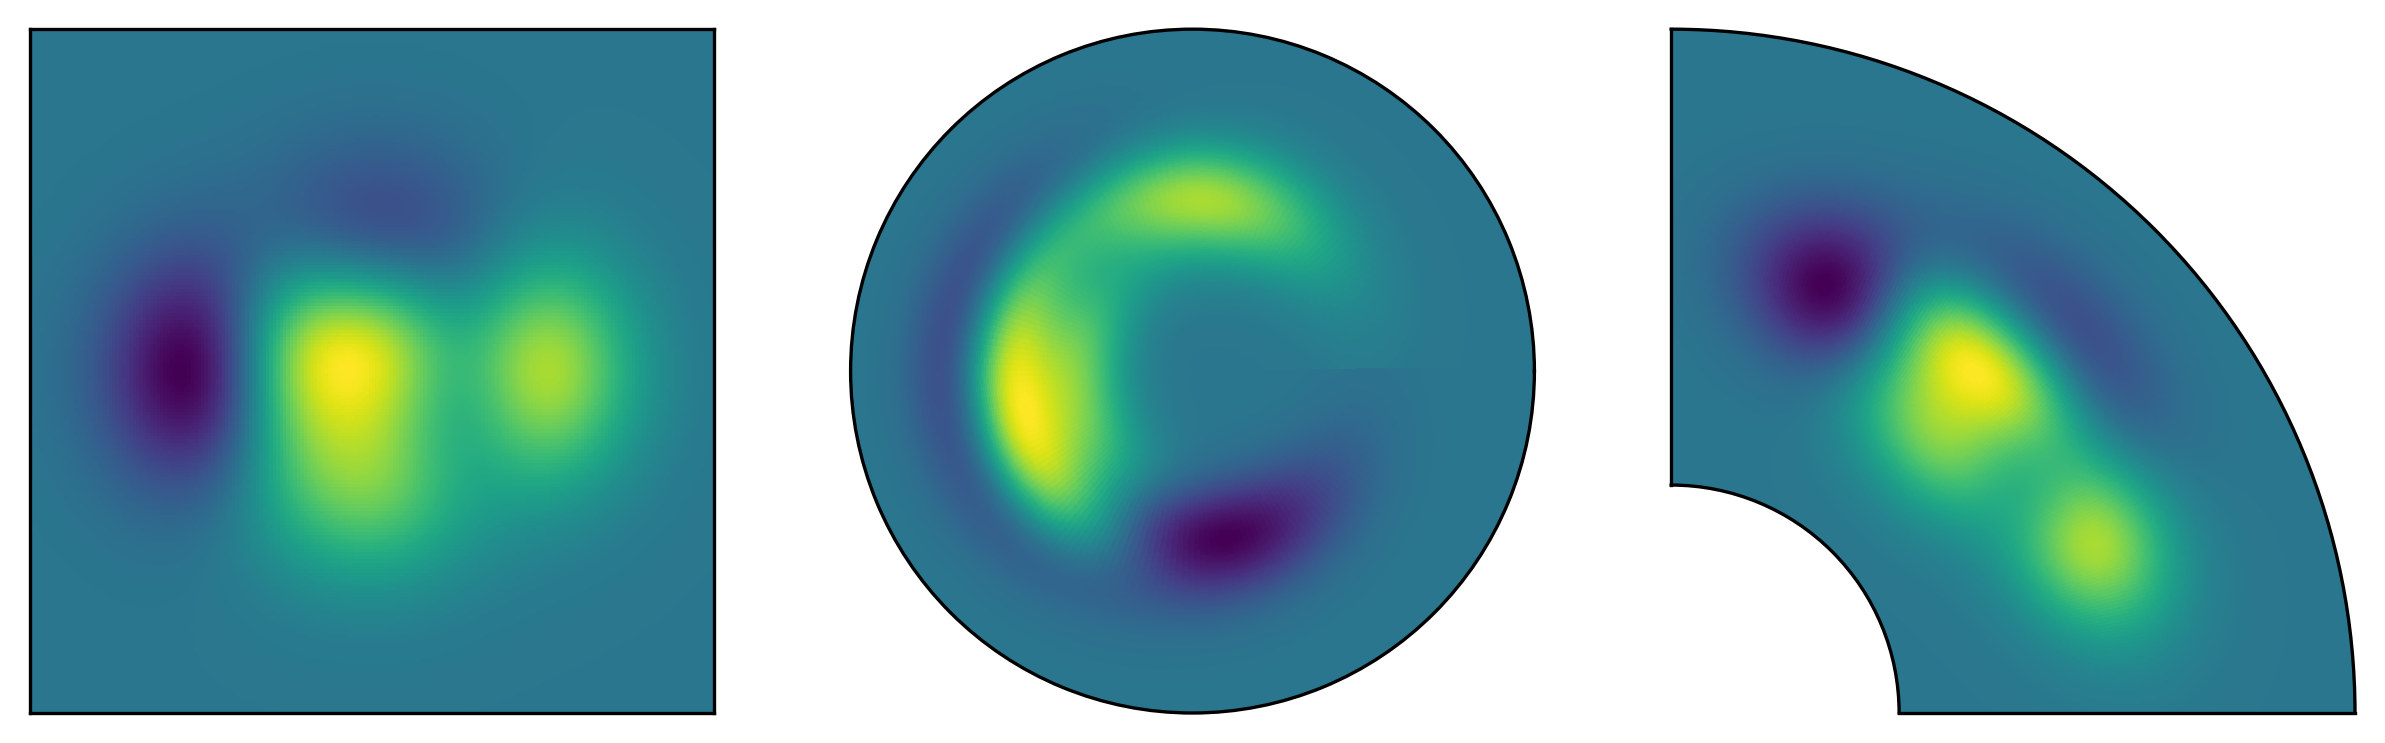

In [11]:
import numpy as np
import matplotlib.pyplot as plt


X,Y = np.meshgrid(np.linspace(-3, 3, 200),
                  np.linspace(-3, 3, 200))
Z =(1-X/2+X**5+Y**3)*np.exp(-X**2-Y**2)

fig = plt.figure(figsize=(10,10), dpi=300)

# Regular imshow
ax = plt.subplot(1, 3, 1)
ax.imshow(Z)
ax.set_xticks([])
ax.set_yticks([])

# Full polar "imshow" (pcolormesh)
ax = plt.subplot(1, 3, 2, projection="polar")
ax.pcolormesh(np.linspace(0, 2*np.pi, 200),
              np.linspace(0, 1, 200), Z[::-1,::-1], shading='auto')
ax.set_rticks([])
ax.set_xticks([])

# Partial polar "imshow" (pcolormesh)
ax = plt.subplot(1, 3, 3, projection="polar")
ax.pcolormesh(np.linspace(0, np.pi/2, 200),
              np.linspace(0, 1, 200), Z[::-1,::-1], shading='auto')
ax.set_rticks([])
ax.set_xticks([])
ax.set_rmin(0); ax.set_rmax(1)
ax.set_rorigin(-.5)
ax.set_thetamin(0)
ax.set_thetamax(90)

plt.show();

---

# Exercises <a name="exercises"></a><span style="float:right;"><a class="small" style="color:black; text-decoration: none; " href="#TOC">[Back to TOC]</a></span>



## Custom log-log

In the figure below, a circle is plotted using linear axis, log axis and a combination. The goal is to reproduce the figure, especially the sub-figure on the right. To do that, you'll need to transform manually your data.

<img src="data/03-exercise-1.png" width="100%" />

## Polar patterns

Try to reproduce the figure below displayin [microphone polar patterns](https://en.wikipedia.org/wiki/Microphone#Polar_patterns).

<img src="data/03-exercise-2.png" width="100%" />